# utils

The `utils` module is the `junk drawer` of the repository.

In [1]:
def chirp(duration, fs, f0, f1, method='logarithmic'):
    from scipy.signal import chirp
    import numpy as np

    t = np.arange(0, int(duration * fs)) / fs
    return chirp(t, f0=f0, f1=f1, t1=duration, method=method)

## `array_to_audiosegment`

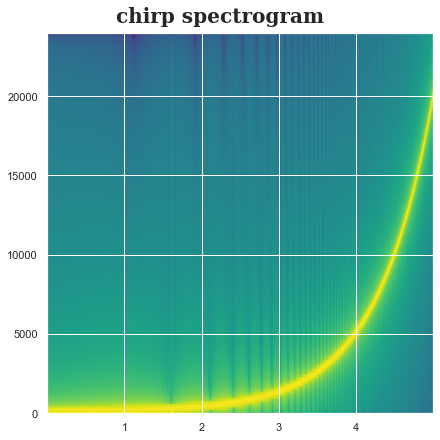

In [2]:
from IPython.display import display
from utils import array_to_audiosegment, play_audio
from visualization import spectrogram

duration_seconds = 5
sample_rate = 48000
starting_frequency = 20
ending_frequency = 20000
left = chirp(duration_seconds, sample_rate, starting_frequency, ending_frequency)

args = dict(fs=sample_rate, suptitle='chirp spectrogram')

plt = spectrogram(left, **args)

left = array_to_audiosegment(left, sample_rate)

display(play_audio(left))

## `arrays_to_audiosegment`

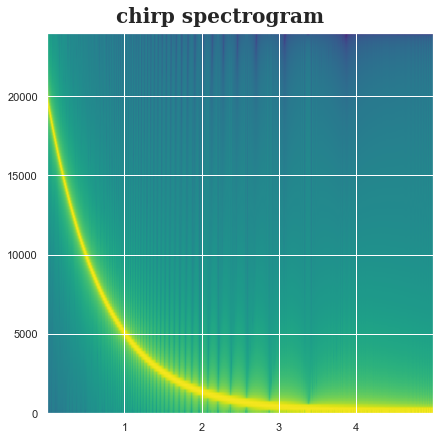

In [3]:
from utils import arrays_to_audiosegment
left = chirp(duration_seconds, sample_rate, starting_frequency, ending_frequency)
right = chirp(duration_seconds, sample_rate, ending_frequency, starting_frequency)
plt = spectrogram(right, **args)
x = arrays_to_audiosegment(left, right, sample_rate)
display(play_audio(x))

## `audiosegment_to_array`

[-1.          0.9999695   0.9999695  ...  0.0395813   0.46548462
 -0.8457031 ]


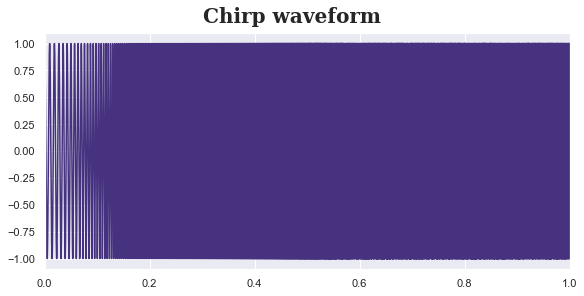

In [4]:
from utils import audiosegment_to_array
from visualization import wave
left = array_to_audiosegment(left, x.frame_rate)
x = audiosegment_to_array(left)

args = dict(suptitle='Chirp waveform', xlim=(0, 0.2))
plt = wave(x, **args)
print(x)

## `split_channels`

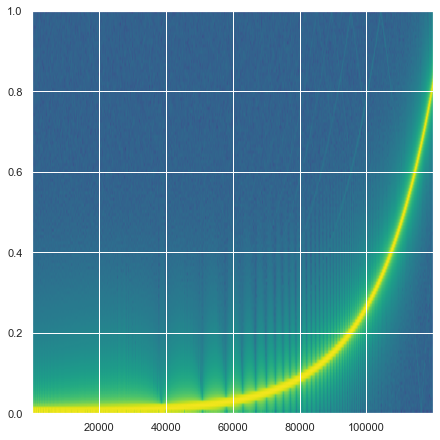

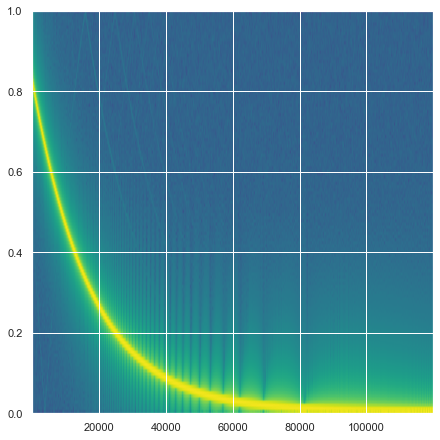

In [5]:
from utils import split_channels

left = chirp(duration_seconds, sample_rate, starting_frequency, ending_frequency)
right = chirp(duration_seconds, sample_rate, ending_frequency, starting_frequency)

x = arrays_to_audiosegment(left, right, sample_rate)
display(play_audio(x))

left, right = split_channels(x)

plt = spectrogram(left)
plt = spectrogram(right)

## `is_notebook`

In [6]:
from utils import is_notebook

print(is_notebook())

True


## `play_audio`

In [7]:
display(play_audio(x))

## `generate_impulse`


In [25]:
from utils import generate_impulse
import numpy as np

duration = 5
ii = generate_impulse(duration)

display(play_audio(ii))
